In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') # to mount the drive data into colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/ML nishit sir/Analysis_classification_techniques"

/content/drive/My Drive/ML nishit sir/Analysis_classification_techniques


In [ ]:
dataset=pd.read_csv("winequality-red.csv")
print(dataset)
dataset.shape

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

(1599, 12)

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
dataset.shape

(1599, 12)

In [ ]:
import seaborn as sns   # For Correlation 
corr = dataset.corr()
print(corr)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

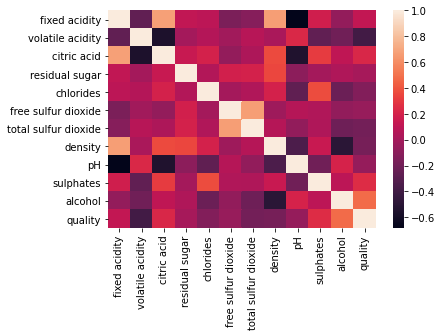

In [ ]:
sns.heatmap(corr)

In [ ]:
#Shuffle rows
#dataset =dataset.sample(frac=1)

In [ ]:
# split data into two parts training and testing 
train_set = dataset.sample(frac=0.90,random_state=0)
test_set = dataset.drop(train_set.index)
print(train_set.shape)
print(test_set.shape)

(1439, 12)
(160, 12)


In [ ]:
# bipartion in feature and target
train_set_feature = train_set.values[:,[0,1,2,3,4,5,6,7,8,9,10]]
train_set_target = train_set.values[:,-1:]
test_set_feature = test_set.values[:,[0,1,2,3,4,5,6,7,8,9,10]]
test_set_target = test_set.values[:,-1:]
data_feature = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values
data_target = dataset.iloc[:,-1:].values
print(train_set_feature.shape)
print(train_set_target.shape)
print(test_set_feature.shape)
print(test_set_target.shape)
print(data_target)

(1439, 11)
(1439, 1)
(160, 11)
(160, 1)
[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]


In [ ]:
train_set_target = train_set_target.reshape(1439,)

### **Supervised**

### **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Find Eucledian Distance Between point-1 and point-2
def eucledian_distance(p1,p2):
    distance = (p1-p2)**2
    distance =np. sum(distance)
    return  math.sqrt(distance)

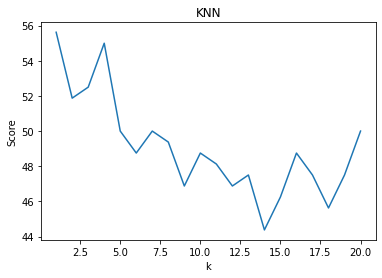

[55.625, 51.87500000000001, 52.5, 55.00000000000001, 50.0, 48.75, 50.0, 49.375, 46.875, 48.75, 48.125, 46.875, 47.5, 44.375, 46.25, 48.75, 47.5, 45.625, 47.5, 50.0]


In [ ]:
score=[]
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    model.fit(train_set_feature,train_set_target)
    prediction = model.predict(test_set_feature)
    score.append(model.score(test_set_feature, test_set_target) * 100)
x=np.arange(1,21,step=1)
plt.plot(x,score)
plt.title('KNN')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()
print(score)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform')
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)
score = model.score(test_set_feature, test_set_target) * 100
print(score)

55.625


In [ ]:
# It will give precision,recall,f1-score,support for each class
#macro average : averaging the unweighted mean per label
#weighted average : averaging the support-weighted mean per label
def make_report(y_actual,y_pred):
    confusionMatrix=confusion_matrix(y_actual, y_pred, labels=[i for i in range(22)])
    report = classification_report(y_actual, y_pred)
    print(report)

In [ ]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         7
         5.0       0.66      0.62      0.64        64
         6.0       0.54      0.59      0.56        64
         7.0       0.65      0.44      0.52        25
         8.0       0.00      0.00      0.00         0

    accuracy                           0.56       160
   macro avg       0.31      0.28      0.29       160
weighted avg       0.58      0.56      0.56       160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(train_set_feature,train_set_target)
prediction = model.predict(test_set_feature)

print(model.score(test_set_feature, test_set_target) * 100)

75.625


In [ ]:
make_report(test_set_target,prediction)

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         7
         5.0       0.76      0.84      0.80        64
         6.0       0.73      0.83      0.77        64
         7.0       0.93      0.56      0.70        25

    accuracy                           0.76       160
   macro avg       0.60      0.56      0.57       160
weighted avg       0.74      0.76      0.74       160



For Supervised methods for classification, 
Accuracy of
KNN = 55.625
Random Forest = 75.625

So we can consider that Random forest gives accurate output compared to KNN



### **Unsupervised**

### **Kmeans**

In [ ]:
from sklearn.cluster import KMeans

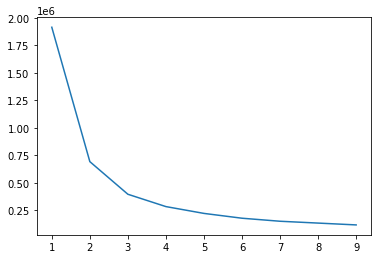

In [ ]:
wcss = []
for i in range(1,10):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmean.fit_predict(data_feature)
  wcss.append(kmean.inertia_)
plt.plot(range(1,10),wcss)


In [ ]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmean.fit_predict(data_feature)
print(y_kmeans)

[0 4 4 ... 0 0 0]


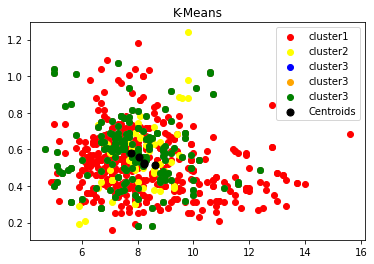

In [ ]:
x=np.array(x)
plt.scatter(data_feature[y_kmeans==0,0],data_feature[y_kmeans==0,1],c='red',label='cluster1')
plt.scatter(data_feature[y_kmeans==1,0],data_feature[y_kmeans==1,1],c='yellow',label='cluster2')
plt.scatter(data_feature[y_kmeans==2,0],data_feature[y_kmeans==2,1],c='blue',label='cluster3')
plt.scatter(data_feature[y_kmeans==2,0],data_feature[y_kmeans==2,1],c='orange',label='cluster3')
plt.scatter(data_feature[y_kmeans==2,0],data_feature[y_kmeans==2,1],c='green',label='cluster3')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('K-Means')
plt.legend()

### **Hierarchical Clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

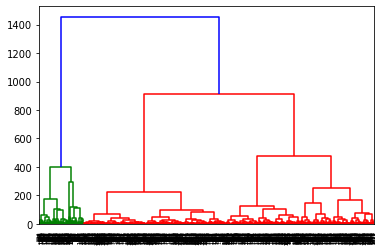

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data_feature,method='ward'))

In [ ]:
hc=AgglomerativeClustering(n_clusters=5)

In [ ]:
y_hc=hc.fit_predict(data_feature)
y_hc

array([3, 1, 1, ..., 3, 1, 3])

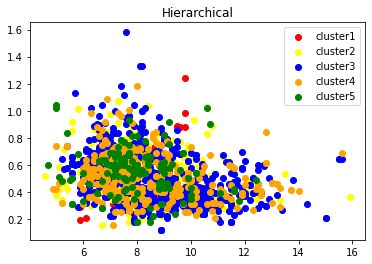

In [ ]:
x=np.array(data_feature)
plt.scatter(data_feature[y_hc==0,0],data_feature[y_hc==0,1],c='red',label='cluster1')
plt.scatter(data_feature[y_hc==1,0],data_feature[y_hc==1,1],c='yellow',label='cluster2')
plt.scatter(data_feature[y_hc==2,0],data_feature[y_hc==2,1],c='blue',label='cluster3')
plt.scatter(data_feature[y_hc==3,0],data_feature[y_hc==3,1],c='orange',label='cluster4')
plt.scatter(data_feature[y_hc==4,0],data_feature[y_hc==4,1],c='green',label='cluster5')
plt.title('Hierarchical')
plt.legend()



### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X=StandardScaler().fit_transform(data_feature)

In [ ]:
ns=3
nearestneighbours=NearestNeighbors(3).fit(X)
nearestneighbours

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [ ]:
distances, indices = nearestneighbours.kneighbors(X)
indices

array([[   4,    0,    5],
       [   1,    2,  140],
       [   2,  214,   63],
       ...,
       [1592, 1596, 1517],
       [1597, 1536, 1594],
       [1598,  315, 1248]])

In [ ]:
distanceDec = sorted(distances[:,ns-1], reverse=True)

In [ ]:
distances

array([[0.        , 0.        , 0.35396275],
       [0.        , 1.34821013, 1.6688589 ],
       [0.        , 0.79921558, 1.16070974],
       ...,
       [0.        , 0.        , 1.10276337],
       [0.        , 1.07203887, 1.26506045],
       [0.        , 1.6198732 , 1.66026884]])

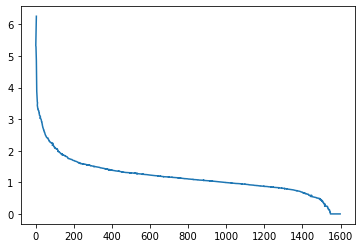

In [ ]:
plt.plot(indices[:,0], distanceDec) 

In [ ]:
db=DBSCAN(eps=2,min_samples=5).fit(X)

In [ ]:
labels = db.labels_
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
db.core_sample_indices_

array([   0,    1,    2, ..., 1596, 1597, 1598])

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [ ]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [ ]:
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 126


In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

In [ ]:
np.linspace(0, 1, len(unique_labels))

array([0.        , 0.33333333, 0.66666667, 1.        ])

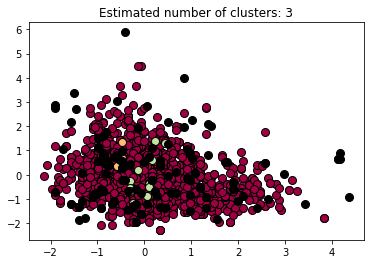

In [ ]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)          #noise point will be true else it will be false

    xy = X[class_member_mask & core_samples_mask]                             #core sample and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]                            #not core sample i.e boundary samples and not noise sample
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In this dataset, More accuracy can be obtained if we can divide our classes to binary then more accuracy can be obtained. For Classification, my conclusion given above. But In my dataset, I didnt find any strong corelation with the target variable as I got found through heatmap shown. Also changed the features, but similar accuracy is obtained. For clustering methods, not able to find accuracy through Jackard method. But DBSCSAN has more efficient output compared to Hierarchical and KMeans and due to limitation of the clusters dimensions as features are taken more. 